# K-nearest neigbours (KNN)


# 1. **Introduction**

How would you descibe a square? a circle? What about an apple or a banana? Intuitively these things are easy to picture, but how could we teach a computer to do so as well 🤔. 

1.1 Motivation


At it's core we need to form some kind of basis for pattern recognition - a way for the computer to be able to recognize and classify different images. There are many ways to do this, but one of the easiest to implement and understand is the **k nearest neighbours (kNN)** algorithm.

1.2 How it Works

Simply put, the kNN algorithm takes a cookie cutter approach to classifying images. Imagine you had a dataset of 10,000 birds, and a "test" image of a Cardinal. All the kNN would do is compare the picture of the Cardinal to **every** picture in the dataset and return the **k** closest images. Hence the name **k nearest neighbours**

1.3 Parameters

You might be asking: what determines how close two images are? How many k images are returned? These are known as parameters. Parameters, hyperparameters and tuning for performance will be discussed in another module

# 2. Nearest neighbour implementation (k = 1)

2.0 Import Dependencies

In [2]:
from google.colab import drive, files
from matplotlib import pyplot as plt
import numpy as np
import os
import cv2
import imghdr

drive.mount('/content/gdrive')

Mounted at /content/gdrive


2.1 Train

In [3]:
train = "/content/gdrive/MyDrive/Code/ML/CS231n/Neural Networks/MNIST_DATA/Train"
test = "/content/gdrive/MyDrive/Code/ML/CS231n/Neural Networks/MNIST_DATA/Test/Data"

2.2 Predict

In [11]:
def predict(Xtest):
  results = []
  
  for image_class in os.listdir(train): # iterate through train data
    for image in os.listdir(os.path.join(train, image_class)): # iterate through each image class
      image_path = os.path.join(train, image_class, image) 
      Xtrain = cv2.imread(image_path) # reads image as numpy array (initially is a jpg)
      distance = np.sum(cv2.absdiff(Xtest, Xtrain)) # L1 distance between test image and train image
      results.append([distance, image_path]) # add distance to results array

  results.sort()

  return results

In [21]:
Xtest = cv2.imread("/content/gdrive/MyDrive/Code/ML/CS231n/Neural Networks/MNIST_DATA/Test/Data/1.jpg")
Ytest = predict(Xtest)[0][1]

2.3 Results

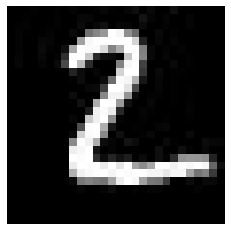

In [22]:
# Test image
plt.imshow(Xtest)
plt.axis("off")
plt.show()

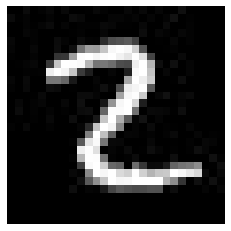

In [23]:
# Returned an image of a 2 as its "closest neighbour", which is the correct class!
Ytest = cv2.imread(Ytest)
plt.imshow(Ytest)
plt.axis("off")
plt.show()

# 3. k = 3 implementation

Let's use a different image

In [36]:
Xtest = cv2.imread("/content/gdrive/MyDrive/Code/ML/CS231n/Neural Networks/MNIST_DATA/Test/Data/4.jpg")
Ytest = predict(Xtest)[:3]

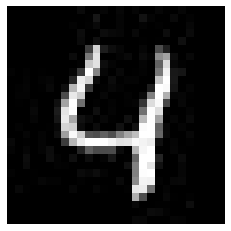

In [37]:
# Test image
plt.imshow(Xtest)
plt.axis("off")
plt.show()

(-0.5, 27.5, 27.5, -0.5)

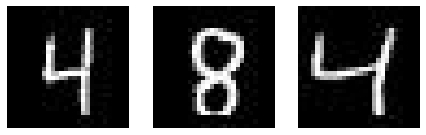

In [38]:
# Let's take a look at the 3 nearest neighbours
Ytest1 = cv2.imread(Ytest[0][1])
Ytest2 = cv2.imread(Ytest[1][1])
Ytest3 = cv2.imread(Ytest[2][1])

fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 4

fig.add_subplot(rows, columns, 1)
plt.imshow(Ytest1)
plt.axis("off")

fig.add_subplot(rows, columns, 2)
plt.imshow(Ytest2)
plt.axis("off")

fig.add_subplot(rows, columns, 3)
plt.imshow(Ytest3)
plt.axis("off")

This test image has a 66.7% predicted class of 4, and 33.3% class of 8. What's interesting is if we used the same test image but chose a k value of two instead of three, there would be a 50% chance of 4 and 50% chance of 8. Therefore by increasing the k value you will intuitively create decision boundaries that make the classifier more resistant to outliers.

Ex.
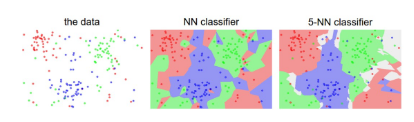

# 4. Pitfalls

*   Slow and computationally expensive to use at test time, since classifying a test example requires a comparison to every single training example
*   Not accurate especially for more complex images
*   Using distances over high-dimensional spaces can be very counter-intuitive, as the images below illustrates the point that the pixel-based L1 similarities we developed above are very different from perceptual similarities:

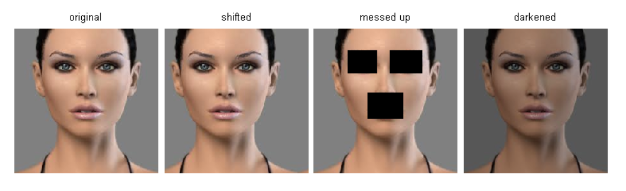